# Data Access

In [2]:
api_url="https://earth-search.aws.element84.com/v0"

In [3]:
from pystac_client import Client

In [4]:
client=Client.open(api_url)
client

id: earth-search
title: Earth Search
description: A STAC API of AWS Public Datasets powered by stac-server
stac_api_version: 0.9.0
type: Catalog
id: sentinel-s2-l2a
title: Sentinel 2 L2A
"description: Sentinel-2a and Sentinel-2b imagery, processed to Level 2A (Surface Reflectance)"
providers: ESA (producer) Sinergise (processor) AWS (host) Element 84 (processor)
type: Collection
https://stac-extensions.github.io/item-assets/v1.0.0/schema.json


In [5]:
#https://pystac.readthedocs.io/en/stable/api.html
for collection in client.get_collections():
    print(collection)

<CollectionClient id=sentinel-s2-l2a>
<CollectionClient id=sentinel-s2-l1c>
<CollectionClient id=sentinel-s2-l2a-cogs>
<CollectionClient id=landsat-8-l1-c1>


In [6]:
?client


Type:        Client
String form: <Client id=earth-search>
File:        c:\users\pirouz\anaconda3\envs\geospatial\lib\site-packages\pystac_client\client.py
Docstring:  
A Client for interacting with the root of a STAC Catalog or API

Instances of the ``Client`` class inherit from :class:`pystac.Catalog`
and provide a convenient way of interacting
with STAC Catalogs OR STAC APIs that conform to the `STAC API spec
<https://github.com/radiantearth/stac-api-spec>`_.
In addition to being a valid
`STAC Catalog
<https://github.com/radiantearth/stac-spec/blob/master/catalog-spec/catalog-spec.md>`_
APIs that have a ``"conformsTo"`` indicate that it supports additional
functionality on top of a normal STAC Catalog,
such as searching items (e.g., /search endpoint).

In [8]:
dir(client)

['DEFAULT_FILE_NAME',
 'STAC_OBJECT_TYPE',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_conforms_to',
 '_get_collections_href',
 '_make_absolute_href',
 '_object_links',
 '_repr_html_',
 '_resolved_objects',
 '_stac_io',
 '_supports_collections',
 'add_child',
 'add_children',
 'add_item',
 'add_items',
 'add_link',
 'add_links',
 'catalog_type',
 'clear_children',
 'clear_items',
 'clear_links',
 'clone',
 'describe',
 'description',
 'extra_fields',
 'from_dict',
 'from_file',
 'full_copy',
 'fully_resolve',
 'generate_subcatalogs',
 'get_all_collections',
 'get_all_items',
 'get_child',
 'g

In [9]:
help(client)

Help on Client in module pystac_client.client object:

class Client(pystac.catalog.Catalog)
 |  Client(id: str, description: str, title: Optional[str] = None, stac_extensions: Optional[List[str]] = None, extra_fields: Optional[Dict[str, Any]] = None, href: Optional[str] = None, catalog_type: pystac.catalog.CatalogType = <CatalogType.ABSOLUTE_PUBLISHED: 'ABSOLUTE_PUBLISHED'>, *, modifier: Optional[Callable[[Union[pystac.collection.Collection, pystac.item.Item, pystac.item_collection.ItemCollection, dict]], NoneType]] = None, **kwargs: Dict[str, Any])
 |  
 |  A Client for interacting with the root of a STAC Catalog or API
 |  
 |  Instances of the ``Client`` class inherit from :class:`pystac.Catalog`
 |  and provide a convenient way of interacting
 |  with STAC Catalogs OR STAC APIs that conform to the `STAC API spec
 |  <https://github.com/radiantearth/stac-api-spec>`_.
 |  In addition to being a valid
 |  `STAC Catalog
 |  <https://github.com/radiantearth/stac-spec/blob/master/catalog

In [16]:
collection_id="sentinel-s2-l2a-cogs"

In [12]:
from shapely.geometry import Point

point=Point(4.89,52.37) #lon: easting, lat: northing, AMS: coordinates

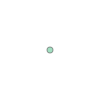

In [13]:
point

In [19]:
search=client.search(collections=[collection_id],intersects=point,max_items=10,)
search.matched()

779

In [21]:
items=search.get_all_items()
items

id: S2B_31UFU_20230328_0_L2A
"bbox: [4.809872421742005, 52.22257539160586, 6.1417542968794585, 53.22867906058126]"
datetime: 2023-03-28T10:46:28Z
platform: sentinel-2b
constellation: sentinel-2
instruments: ['msi']
gsd: 10
view:off_nadir: 0
proj:epsg: 32631
sentinel:utm_zone: 31
sentinel:latitude_band: U


In [22]:
len(items)

10

In [23]:
for item in items:
    print(item)

<Item id=S2B_31UFU_20230328_0_L2A>
<Item id=S2A_31UFU_20230326_0_L2A>
<Item id=S2A_31UFU_20230323_0_L2A>
<Item id=S2B_31UFU_20230321_1_L2A>
<Item id=S2B_31UFU_20230318_0_L2A>
<Item id=S2A_31UFU_20230316_0_L2A>
<Item id=S2A_31UFU_20230313_0_L2A>
<Item id=S2B_31UFU_20230311_0_L2A>
<Item id=S2B_31UFU_20230308_0_L2A>
<Item id=S2A_31UFU_20230306_0_L2A>


In [27]:
item=items[0]
item.datetime

datetime.datetime(2023, 3, 28, 10, 46, 28, tzinfo=tzutc())

In [28]:
item.geometry

{'type': 'Polygon',
 'coordinates': [[[6.071664488869862, 52.22257539160586],
   [4.809872421742005, 52.2486812017905],
   [5.234043867697867, 53.22867906058126],
   [6.1417542968794585, 53.20819279121764],
   [6.071664488869862, 52.22257539160586]]]}

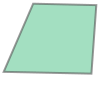

In [29]:
from shapely.geometry import shape

shape(item.geometry)

In [31]:
item.properties

{'datetime': '2023-03-28T10:46:28Z',
 'platform': 'sentinel-2b',
 'constellation': 'sentinel-2',
 'instruments': ['msi'],
 'gsd': 10,
 'view:off_nadir': 0,
 'proj:epsg': 32631,
 'sentinel:utm_zone': 31,
 'sentinel:latitude_band': 'U',
 'sentinel:grid_square': 'FU',
 'sentinel:sequence': '0',
 'sentinel:product_id': 'S2B_MSIL2A_20230328T103639_N0509_R008_T31UFU_20230328T134002',
 'sentinel:data_coverage': 66.9,
 'eo:cloud_cover': 0,
 'sentinel:valid_cloud_cover': False,
 'sentinel:processing_baseline': '05.09',
 'sentinel:boa_offset_applied': True,
 'created': '2023-03-28T17:38:04.879Z',
 'updated': '2023-03-28T17:38:04.879Z'}

In [40]:
#query: bbox, datetime, cloud cover
bbox=point.buffer(0.02).bounds

In [37]:
date_range="2020-03-20/2020-03-30"

In [38]:
query_cloud_cover="eo:cloud_cover<10"

In [43]:
search=client.search(collections=[collection_id],bbox=bbox, datetime=date_range,query=[query_cloud_cover])
search.matched()

4

In [44]:
items=search.get_all_items()


In [45]:
len(items)

4

In [49]:
items.save_object("search.geojson")

In [50]:
item=items[0]
item.assets.keys()

dict_keys(['thumbnail', 'overview', 'info', 'metadata', 'visual', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'AOT', 'WVP', 'SCL'])

In [51]:
asset=item.assets["thumbnail"]

In [52]:
asset.href

'https://roda.sentinel-hub.com/sentinel-s2-l1c/tiles/31/U/FU/2020/3/28/0/preview.jpg'

In [53]:
import rioxarray

In [55]:
b_01_href=item.assets["B01"].href

In [56]:
b_01_href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/B01.tif'

In [58]:
b_01=rioxarray.open_rasterio(b_01_href)
b_01

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0